### Imports + parameters

In [1]:
import librosa
from audio_preprocess import AudioPreprocessor
import soundfile as sf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 

In [2]:
# Define parameters of AudioPreprocessor
SAMPLE_RATE = 22050
DURATION = 30
HOP_LENGTH_FACTOR = 7.45
N_FFT = 1599*2
MONO = True
hop_length = int(SAMPLE_RATE / HOP_LENGTH_FACTOR)
# Create an instance of an object of class AudioPreprocessor
audiopreprocessor = AudioPreprocessor(SAMPLE_RATE, DURATION, HOP_LENGTH_FACTOR, N_FFT)


### GTZAN dataset

In [3]:
# experiment with one file only using audiopreprocessor
audio_file_try = 'data/genres_original/jazz/jazz.00094.wav'
 
audio_section = audiopreprocessor.load_audio(audio_file_try, select_section = False)
audio_section = audiopreprocessor.normalize_amplitude(audio_section)

spec_try = audiopreprocessor.compute_log_spectrogram(audio_section)


In [4]:
# experiment with one file only without audiopreprocessor (achieves exactly the same result)

stft_result = librosa.stft(audio_section, n_fft=N_FFT, hop_length=hop_length)
spec_try_2 = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)
print(stft_result.shape, spec_try_2.shape)

plt.imsave('spec_try.png', spec_try_2, cmap='grey')  # Save the image (use cmap='gray' for grayscale images)

In [ ]:
# Iterate over the files and save images in the "spectrograms" folder
base_dir = 'data/genres_original'

# Loop through each subfolder in the base directory
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    # Check if the path is a directory
    if os.path.isdir(subfolder_path):
        # Loop through each audio file in the subfolder
        for audio_file in os.listdir(subfolder_path):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(subfolder_path, audio_file)
#                print(audio_file.split(".")[0]+audio_file.split(".")[1])
                
                # Load, normalize, and compute the spectrogram of the audio file
                audio_section = audiopreprocessor.load_audio(audio_file_path, select_section= False)
                audio_section = audiopreprocessor.normalize_amplitude(audio_section)
                spectrogram = audiopreprocessor.compute_log_spectrogram(audio_section)
                
                plt.imsave(f'spectrograms/{audio_file.split(".")[0]+audio_file.split(".")[1]}.png', spectrogram, cmap='gray')

In [8]:
# reconstructs audio form the intermediate result (stft) where phase information is preserved
reconstruction_audio = librosa.istft(stft_result, n_fft = N_FFT, hop_length=hop_length)
input_audio_path = "input_audio.mp3"
sf.write(input_audio_path, audio_section, SAMPLE_RATE, format='MP3')


output_audio_path = 'output_audio_224.mp3'
sf.write(output_audio_path, reconstruction_audio, SAMPLE_RATE, format='MP3')

print(f"Audio saved as {output_audio_path}")

Audio saved as output_audio_224.mp3


### Loading audio and preprocessing + spec

In [ ]:


# Initialize an empty list to store the spectrograms and file paths
data = []

# Define the base directory containing the audio files
base_dir = 'data/genres_original'

# Loop through each subfolder in the base directory
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    # Check if the path is a directory
    if os.path.isdir(subfolder_path):
        # Loop through each audio file in the subfolder
        for audio_file in os.listdir(subfolder_path):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(subfolder_path, audio_file)
                
                # Load, normalize, and compute the spectrogram of the audio file
                audio_section = audiopreprocessor.load_audio(audio_file_path, select_section= False)
                audio_section = audiopreprocessor.normalize_amplitude(audio_section)
                spectrogram = audiopreprocessor.compute_log_spectrogram(audio_section)
                
                # Append the spectrogram and file path to the data list
                data.append({'file_path': audio_file_path, 'spectrogram': spectrogram})

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame (optional, for verification)
print(df)



In [34]:
# Optionally save the DataFrame to a CSV file for future reference
df.to_csv('spectrograms.csv', index=False)

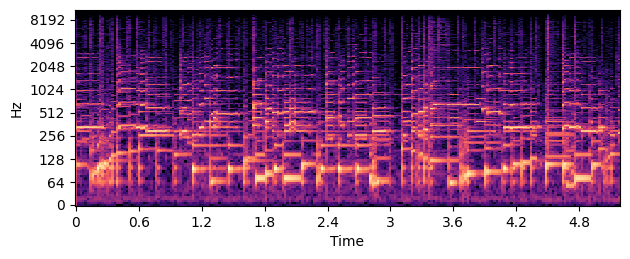

In [12]:
import matplotlib.pyplot as plt
import librosa.display

# Create a figure with two subplots, one below the other

# First spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(spec_try_2, y_axis='log', x_axis='time', sr=SAMPLE_RATE)
plt.tight_layout()

plt.savefig('spectrogram_2.png', bbox_inches='tight', pad_inches=0)

# # Second spectrogram (can be the same or different)
# plt.subplot(2, 1, 2)
# librosa.display.specshow(padded_log_spec, y_axis='log', x_axis='time', sr=SAMPLE_RATE)
# plt.colorbar(format='%+2.0f dB')
# plt.title('Spectrogram 2')
# plt.tight_layout()

# # Display the plots
# plt.show()


### Visualize audio

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your audio signal stored in a variable named 'audio_signal'
# Generate time array
duration = 10  # Duration of the audio signal in seconds
sample_rate = 22050  # Sample rate (Hz)
t = np.linspace(0, duration, len(audio_section), endpoint=False)  # Time array

# Plot the audio signal
plt.figure(figsize=(10, 4))
plt.plot(t, audio_section, color='b')
plt.title('Mono Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

### Spectrogram + Random Crop + Padding

In [68]:
stft_result = librosa.stft(audio_section, n_fft=N_FFT, hop_length=hop_length)
log_spec = librosa.amplitude_to_db(np.abs(stft_result), ref=np.max)

In [69]:
import numpy as np

# Dimensions of the crop
crop_height = 200
crop_width = 100

start_row = 10
start_col = 0


# Take the random crop
crop_stft = stft_result[start_row:start_row + crop_height, start_col:start_col + crop_width]
crop_spec = log_spec[start_row:start_row + crop_height, start_col:start_col + crop_width]

# Initialize padded arrays with zeros
padded_stft_result = np.zeros_like(stft_result)
padded_log_spec = np.zeros_like(log_spec)

# Place the crop in the original-sized arrays
padded_stft_result[start_row:start_row + crop_height, start_col:start_col + crop_width] = crop_stft
padded_log_spec[start_row:start_row + crop_height, start_col:start_col + crop_width] = crop_spec

print(f"Random crop start indices: ({start_row}, {start_col})")
print("Random crop dimensions:", crop_stft.shape)
print("Padded stft_result dimensions:", padded_stft_result.shape)
print("Padded log_spec dimensions:", padded_log_spec.shape)


Random crop start indices: (10, 0)
Random crop dimensions: (200, 100)
Padded stft_result dimensions: (4097, 313)
Padded log_spec dimensions: (4097, 313)


### Visualize the two spectrograms (normal and cropped+padding)

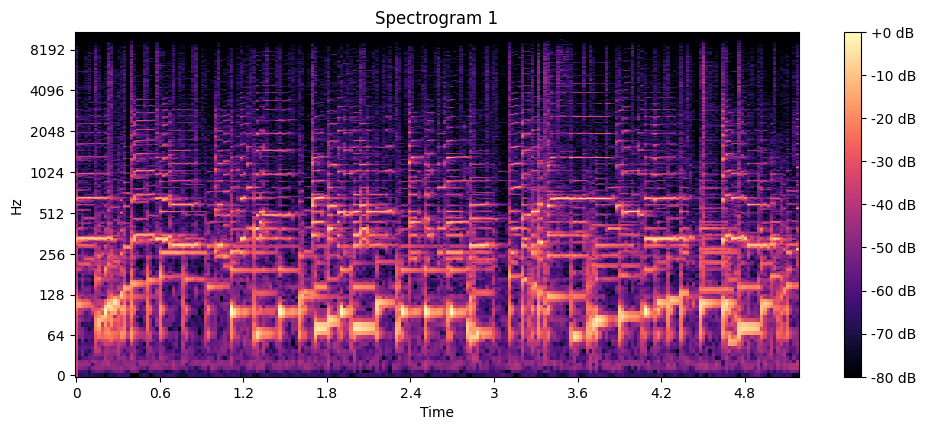

In [80]:
import matplotlib.pyplot as plt
import librosa.display

# Create a figure with two subplots, one below the other
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# First spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(spec_try_2, y_axis='log', x_axis='time', sr=SAMPLE_RATE)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram 1')
plt.tight_layout()

# # Second spectrogram (can be the same or different)
# plt.subplot(2, 1, 2)
# librosa.display.specshow(padded_log_spec, y_axis='log', x_axis='time', sr=SAMPLE_RATE)
# plt.colorbar(format='%+2.0f dB')
# plt.title('Spectrogram 2')
# plt.tight_layout()

# # Display the plots
# plt.show()


In [71]:
reconstruction_audio = librosa.istft(crop_stft, n_fft = N_FFT, hop_length=hop_length)

### Reconstruct and Save audio in output file

In [72]:
input_audio_path = "input_audio.mp3"
sf.write(input_audio_path, audio_section, SAMPLE_RATE, format='MP3')


cropped_file_path = 'cropped_audio.mp3'
sf.write(cropped_file_path, reconstruction_audio, SAMPLE_RATE, format='MP3')

print(f"Audio saved as {cropped_file_path}")

Audio saved as cropped_audio.mp3
